In [2]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data

# Download fashion mnist dataset and save it in ‘data/fashion’ folder otherwise tensorflow will download original mnist dataset.

In [4]:
fashion_mnist_dataset = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


# dimensions of training data

In [5]:
# dimensions of training data
print("dimensions of training data: {shape}".format(shape=fashion_mnist_dataset.train.images.shape))
print("dimensions of training data: {shape}".format(shape=fashion_mnist_dataset.train.labels.shape))

# dimensions of test set
print("dimensions of test set: {shape}".format(shape=fashion_mnist_dataset.test.images.shape))
print("dimensions of test set: {shape}".format(shape=fashion_mnist_dataset.test.labels.shape))

dimensions of training data: (55000, 784)
dimensions of training data: (55000, 10)
dimensions of test set: (10000, 784)
dimensions of test set: (10000, 10)


In [6]:
# Dataset are in 1-D array. Each image is in the form of a 1D NumPy array with 28*28 = 784 elements (each element corresponds to one pixel in the image)

In [7]:
# Fashion mnist dataset are labeled according to below dictionary.
label_dict = {
0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'
}

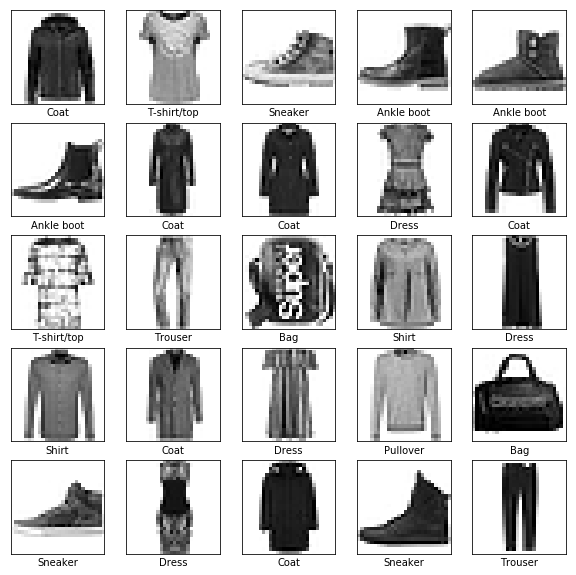

In [8]:
# diplay random images from training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fashion_mnist_dataset.train.images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label_dict[np.where(fashion_mnist_dataset.train.labels[i] == 1)[0][0]])
plt.show()

In [10]:
# train_images = fashion_mnist_dataset.train.images
# test_images = fashion_mnist_dataset.test.images
# train_labels = fashion_mnist_dataset.train.labels
# test_labels = fashion_mnist_dataset.test.labels

In [11]:
# train_images = train_images / 255.0
# test_images = test_images / 255.0

# Network variables

In [9]:
# Units in first hidden layer
n_hidden_1 = 128
# Units in second hidden layer
n_hidden_2 = 128
# Fashion mnist data input (img shape: 28*28)
n_input = 784
# Fashion mnist total classes (0-9 digits), also, no. units in output layer
n_classes = 10

In [11]:
# Create placeholders
def create_placeholders(n_x, n_y):
    """
    n_x and n_y represents size of input vector and no. of output class respectively
    """
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    return X, Y

In [19]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow
    """
    # dimension of weights and biases at 1st layer
    W1 : [n_hidden_1, n_input]
    b1 : [n_hidden_1, 1]
    # dimension of weights and biases at 2nd layer
    W2 : [n_hidden_2, n_hidden_1]
    b2 : [n_hidden_2, 1]
    # dimension of weights and biases at 3rd layer
    W3 : [n_classes, n_hidden_2]
    b3 : [n_classes, 1]
        
    #setting random seed so that initial value of random variable will be the same
    tf.set_random_seed(42)
    
    # Initialize weights and biases for each layer
    
    # First hidden layer
    W1 = tf.get_variable("W1", [n_hidden_1, n_input], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b1 = tf.get_variable("b1", [n_hidden_1, 1], initializer=tf.zeros_initializer())
    
    # Second hidden layer
    W2 = tf.get_variable("W2", [n_hidden_2, n_hidden_1], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b2 = tf.get_variable("b2", [n_hidden_2, 1], initializer=tf.zeros_initializer())
    
    # Output layer
    W3 = tf.get_variable("W3", [n_classes, n_hidden_2], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b3 = tf.get_variable("b3", [n_classes, 1], initializer=tf.zeros_initializer())
    
    # Store initializations as a dictionary of parameters
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    return parameters

In [13]:
def forward_propagation(X, parameters):
    """
    X is the input placeholder, i.e. size of input and parameters are dictionary of parameters that has been 
    defined in earlier function.
    """
    # Retrieve parameters from dictionary
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    """
    In forward propagation, Z represents matrix multiplication and addition of bias value whereas
    A represents implementation of activation function and integer associated with character represents layer no.
    """
    Z1 = tf.add(tf.matmul(W1,X), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1), b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2), b3)
    return Z3

In [17]:
def compute_cost(Z3, Y):
    """
    compute loss between predicted output Z3 and final output Y. Cross-entropy is used to compute loss
    """
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    # Compute cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels))
    return cost

In [20]:
def model(train, test, learning_rate, num_epochs, minibatch_size, print_cost=True, graph_filename='costs'):
    """
    training of model
    """
    ops.reset_default_graph()
    
    # For reproducibility
    tf.set_random_seed(42)
    
    # input and output shapes
    (n_x, m) = train.images.T.shape
    n_y = train.labels.T.shape[0]
    
    costs = []
    
    # Create placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)
    
    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation
    Z3 = forward_propagation(X, parameters)
    
    # Cost function
    cost = compute_cost(Z3, Y)
    
    # Backpropagation (using Adam optimizer)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    # Initialize all variables
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    # Start session to compute Tensorflow graph
    with tf.Session() as sess:
    # Run initialization
        sess.run(init)
        # Training loop
        for epoch in range(num_epochs):
            epoch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            for i in range(num_minibatches):
                # Get next batch of training data and labels
                minibatch_X, minibatch_Y = train.next_batch(minibatch_size)
                # Execute optimizer and cost function
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X.T, Y: minibatch_Y.T})
                # Update epoch cost
                epoch_cost += minibatch_cost / num_minibatches
            # Print the cost every epoch
            if print_cost == True:
                print("Cost after epoch {epoch_num}: {cost}".format(epoch_num=epoch, cost=epoch_cost))
                costs.append(epoch_cost)
        # Plot costs
        plt.figure(figsize=(16,5))
        plt.plot(np.squeeze(costs), color='#2A688B')
        plt.xlim(0, num_epochs-1)
        plt.ylabel("cost")
        plt.xlabel("iterations")
        plt.title("learning rate = {rate}".format(rate=learning_rate))
        plt.savefig(graph_filename, dpi=300)
        plt.show()
        
        # Save parameters
#         parameters = sess.run(parameters)
        save_path = saver.save(sess, "model_mnist_tf.ckpt")
        print("Parameters have been trained!")
        
        # Calculate correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        
        # Calculate accuracy on test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        print ("Train Accuracy:", accuracy.eval({X: train.images.T, Y: train.labels.T}))
        print ("Test Accuracy:", accuracy.eval({X: test.images.T, Y: test.labels.T}))
        
        return parameters

Cost after epoch 0: 0.5078722891398862
Cost after epoch 1: 0.3716864487735228
Cost after epoch 2: 0.3368725267925214
Cost after epoch 3: 0.3090996902969436
Cost after epoch 4: 0.29215075295934556
Cost after epoch 5: 0.27633733386054565
Cost after epoch 6: 0.2613661573881042
Cost after epoch 7: 0.2511781827016485
Cost after epoch 8: 0.2413821412994156
Cost after epoch 9: 0.23287518991523895
Cost after epoch 10: 0.22275382069474028
Cost after epoch 11: 0.2146508887061052
Cost after epoch 12: 0.20688423427305405
Cost after epoch 13: 0.19762306702914162
Cost after epoch 14: 0.1944166865320149
Cost after epoch 15: 0.18266808163218506


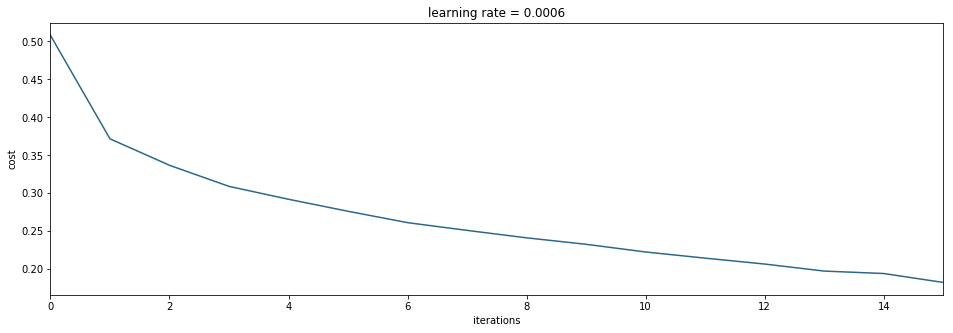

Parameters have been trained!
Train Accuracy: 0.9376909
Test Accuracy: 0.8902


In [21]:
# Running model on Fashion mnist
train = fashion_mnist_dataset.train
test = fashion_mnist_dataset.test
parameters = model(train, test, 0.0006, 16, 32, graph_filename='fashion_mnist_costs')